# Zadanie 12

<h5>Na podstawie zadań 10 i 11 stwórz klasę ClassInterpretation. Klasa posiada metody:</h5>
<ol>
    <li>Zwracające dane odnośnie:</li>
    <ol>
        <li>Średniej</li>
        <li>Mediany</li>
    </ol>
    <li>Metoda str wykonana na obiekcie będzie opisywać słownie grupę studentów</li>
    <li>Metoda float będzie zwracać średnią wszystkich studentów zaokrągloną do 2 miejsca po przecinku</li>
    <li>Dokonaj wizuazlizacji grupy studentow (zaleznosc wyniki ocen od ilosci opuszczonych zajec)</li>
    <li>Dokonaj predykcji dla studenta</li>
</ol>

In [84]:
import numpy as np
from faker import Faker
fake = Faker()
from random import randint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [85]:
class Student:
    def __init__(self, imie, nazwisko, nr_albumu, lista_ocen, nieobecnosci):
        self.imie = imie
        self.nazwisko = nazwisko
        self.nr_albumu = nr_albumu
        self.lista_ocen = lista_ocen
        self.nieobecnosci = nieobecnosci
    
    def przedstaw(self):
        srednia = np.mean(self.lista_ocen)
        if self.nieobecnosci > 2:
            frekwencja = 'słabą'
        else:
            frekwencja = 'dobrą'
        return f'Student: {self.imie} {self.nazwisko}, index: {self.nr_albumu} ma średnią ocen: {srednia}, jest studentem ze {frekwencja} frekwencją.'
    
    @property
    def srednia_ocen(self):
        return np.mean(self.lista_ocen)
        

In [86]:
def generuj_studentow(liczba_studentów):
    lista = list()
    for i in range(liczba_studentów):
        imie = fake.first_name()
        nazwisko = fake.last_name()
        nr_albumu = fake.credit_card_number(card_type=None)
        oceny = [randint(a=2, b=5), randint(a=2, b=5), randint(a=2, b=5), randint(a=2, b=5)]
        nieobecnosci = randint(1,10)
        student = Student(imie, nazwisko, nr_albumu, oceny, nieobecnosci)
        lista.append(student)
    return lista

In [87]:
class ClassInterpretation():
    def __init__(self, lista_studentow):
        self.lista_studentow = lista_studentow
    
    def lista_neobecnosci(self):
        lista_nieobecnosci = [i.nieobecnosci for i in self.lista_studentow]
        return lista_nieobecnosci
        
    def lista_ocen(self):
        lista_ocen = [i.srednia_ocen for i in self.lista_studentow]
        return lista_ocen
    
    def srednia(self):
        lista_ocen = [i.srednia_ocen for i in self.lista_studentow]
        return np.mean(lista_ocen)
    
    def mediana(self):
        lista_ocen = [i.srednia_ocen for i in self.lista_studentow]
        return np.median(lista_ocen)
    
    def __str__(self):
        return f'Grupa składa się z {len(self.lista_studentow)} studentów. Średnia ocen w grupie wynosi {self.srednia()}, a mediana {self.mediana()}.'
        
    def __float__(self):
        return float(round(self.srednia(),2))
    

In [88]:
lista = generuj_studentow(10)
studenci = ClassInterpretation(lista)

In [89]:
print(f'Średnia ocen w grupie wynosi: {studenci.srednia()}')
print(f'Mediana ocen w grupie wynosi {studenci.mediana()}')

Średnia ocen w grupie wynosi: 3.625
Mediana ocen w grupie wynosi 3.75


In [90]:
str(studenci)

'Grupa składa się z 10 studentów. Średnia ocen w grupie wynosi 3.625, a mediana 3.75.'

In [91]:
print(f'Średnia w grupie zaokroąglona do dwóch miejsc po przecinku wynosi {float(studenci)}')

Średnia w grupie zaokroąglona do dwóch miejsc po przecinku wynosi 3.62


<hr>
#### Wizualizacja danych
<hr>

In [92]:
x = studenci.lista_neobecnosci()
y = studenci.lista_ocen()
print(x)
print(y)

[2, 1, 1, 8, 1, 7, 10, 3, 7, 4]
[3.25, 3.5, 3.75, 3.75, 4.0, 3.75, 3.25, 4.25, 2.75, 4.0]


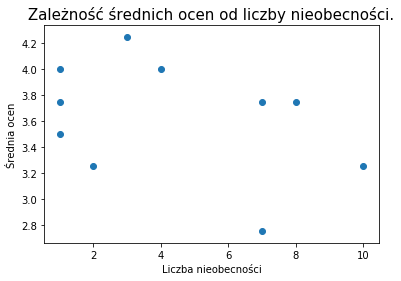

In [93]:
plt.scatter(x = x, y = y)
plt.xlabel('Liczba nieobecności')
plt.ylabel('Średnia ocen')
plt.title('Zależność średnich ocen od liczby nieobecności.', fontsize = 15)
plt.show()

<hr>
#### Modelowanie regresji liniowej
<hr>

In [94]:
X = np.array(x).reshape(-1, 1)
Y = np.array(y).reshape(-1, 1)

In [95]:
regresor = LinearRegression()
regresor.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
regresor.coef_

array([[-0.0498008]])

In [99]:
regresor.predict(5)

array([[3.59511952]])